In [23]:
import numpy as np
from scipy import sparse
from os import listdir
import matplotlib.pyplot as plt

data_dir1 = '../split_gen_ihart_23andme'
data_dir2 = '../split_gen_ihart_ancestry'
data_dir3 = '../split_gen_ihart_neuro'

pos_file1 = '../data/23andme_positions.txt'
pos_file2 = '../data/ancestry_positions.txt'
pos_file3 = '../data/neurochip_positions.txt'

chroms = [str(x) for x in range(1, 23)] + ['X', 'Y']

In [12]:
def pull_chrom(data_dir, chrom):
    # pull sample ids
    sample_file = '%s/chr.%s.gen.samples.txt' % (data_dir, chrom)
    with open(sample_file, 'r') as f:
        sample_ids = [line.strip() for line in f]
    sample_id_to_index = dict([(sample_id, i) for i, sample_id in enumerate(sample_ids)])

    # pull coordinates
    # coordinates[:, 1] is the position
    # coordinates[:, 2] is 1 if the variant is a biallelic SNP else 0
    coordinates = np.load('%s/chr.%s.gen.coordinates.npy' % (data_dir,  chrom))
    snp_positions = coordinates[:, 1]
    snp_indices = coordinates[:, 2]==1

    # pull genotype data from .npz
    gen_files = sorted([f for f in listdir(data_dir) if ('chr.%s.' % chrom) in f and 'gen.npz' in f])
    whole_chrom = sparse.hstack([sparse.load_npz('%s/%s' % (data_dir, gen_file)) for gen_file in gen_files])

    # only keep the biallelic SNPS
    whole_chrom = whole_chrom[:, snp_indices]
    snp_positions = snp_positions[snp_indices]

    m, n = whole_chrom.shape
    #print('chrom %s shape' % chrom, m, n)
    return whole_chrom
    
    

In [13]:
afs1 = []
for chrom in chroms:
    print(chrom, sep=' ')
    A = pull_chrom(data_dir1, chrom).A
    homref = np.sum(A==0, axis=0)
    het = np.sum(A==1, axis=0)
    homalt = np.sum(A==2, axis=0)
    afs1.append((het+2*homalt)/(2*homref + 2*het + 2*homalt))
afs1 = np.hstack(afs1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y


In [14]:
afs2 = []
for chrom in chroms:
    print(chrom, sep=' ')
    A = pull_chrom(data_dir2, chrom).A
    homref = np.sum(A==0, axis=0)
    het = np.sum(A==1, axis=0)
    homalt = np.sum(A==2, axis=0)
    afs2.append((het+2*homalt)/(2*homref + 2*het + 2*homalt))
afs2 = np.hstack(afs2)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y


In [16]:
afs3 = []
for chrom in chroms:
    print(chrom, sep=' ')
    A = pull_chrom(data_dir3, chrom).A
    homref = np.sum(A==0, axis=0)
    het = np.sum(A==1, axis=0)
    homalt = np.sum(A==2, axis=0)
    afs3.append((het+2*homalt)/(2*homref + 2*het + 2*homalt))
afs3 = np.hstack(afs3)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X
Y


In [17]:
afs1_sorted = sorted(afs1, reverse=True)
afs2_sorted = sorted(afs2, reverse=True)
afs3_sorted = sorted(afs3, reverse=True)

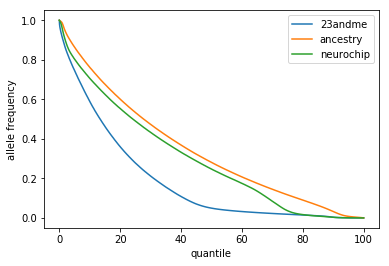

In [36]:
plt.plot(np.arange(0, 100, 100/len(afs1_sorted)), afs1_sorted, label='23andme')
plt.plot(np.arange(0, 100, 100/len(afs2_sorted)), afs2_sorted, label='ancestry')
plt.plot(np.arange(0, 100, 100/len(afs3_sorted)), afs3_sorted, label='neurochip')

plt.ylabel('allele frequency')
plt.xlabel('quantile')
plt.legend()
plt.show()

In [19]:
afs1_minor = np.minimum(afs1, 1-afs1)
afs2_minor = np.minimum(afs2, 1-afs2)
afs3_minor = np.minimum(afs3, 1-afs3)

afs1_minor_sorted = sorted(afs1_minor, reverse=True)
afs2_minor_sorted = sorted(afs2_minor, reverse=True)
afs3_minor_sorted = sorted(afs3_minor, reverse=True)

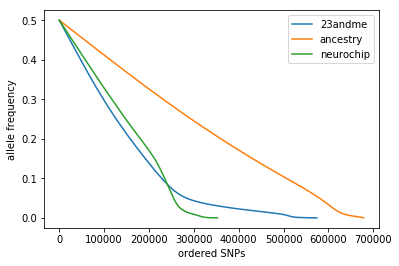

In [20]:
plt.plot(afs1_minor_sorted, label='23andme')
plt.plot(afs2_minor_sorted, label='ancestry')
plt.plot(afs3_minor_sorted, label='neurochip')

plt.ylabel('allele frequency')
plt.xlabel('ordered SNPs')
plt.legend()
plt.show()

In [21]:
def find_missing_positions(data_dir, pos_file):
    
    # first pull all positions on chroms from pos_file
    num_pos = 0
    with open(pos_file, 'r') as f:
        next(f) # skip header
        for line in f:
            pieces = line.strip().split('\t')
            if pieces[1] in chroms or (pieces[1] == '23' and 'X' in chroms) or (pieces[1] == '24' and 'Y' in chroms):
                num_pos += 1
    print('Positions of interest', num_pos)
    
    # now pull all positions from ihart_data
    num_ihart_pos = 0
    for chrom in chroms:
        # pull coordinates
        # coordinates[:, 1] is the position
        # coordinates[:, 2] is 1 if the variant is a biallelic SNP else 0
        coordinates = np.load('%s/chr.%s.gen.coordinates.npy' % (data_dir,  chrom))
        snp_positions = coordinates[:, 1]
        snp_indices = coordinates[:, 2]==1
        num_ihart_pos += np.sum(snp_indices)
    return num_pos, num_ihart_pos, (num_pos-num_ihart_pos)/num_pos
        

In [24]:
print('% Missing')
print('23andme', find_missing_positions(data_dir1, pos_file1))
print('ancestry', find_missing_positions(data_dir2, pos_file2))
print('neurochip', find_missing_positions(data_dir3, pos_file3))

% Missing
Positions of interest 634230
23andme (634230, 574293, 0.09450357125963767)
Positions of interest 701038
ancestry (701038, 678710, 0.031849913984691273)
Positions of interest 485176
neurochip (485176, 352772, 0.2728989067884644)


In [33]:
def find_overlaps(pos_file1, pos_file2):
    
    # first pull all positions on chroms from pos1_file
    poi1 = set()
    with open(pos_file1, 'r') as f:
        next(f) # skip header
        for line in f:
            pieces = line.strip().split('\t')
            chrom = pieces[1]
            if chrom == '23':
                chrom = 'X'
            elif chrom == '24':
                chrom = 'Y'
            
            if chrom in chroms:
                poi1.add((chrom, int(pieces[2])))
                
    #print('Positions of interest 1', len(poi1))
    
    # now pull all positions on chroms from pos2_file
    poi2 = set()
    with open(pos_file2, 'r') as f:
        next(f) # skip header
        for line in f:
            pieces = line.strip().split('\t')
            chrom = pieces[1]
            if chrom == '23':
                chrom = 'X'
            elif chrom == '24':
                chrom = 'Y'
            
            if chrom in chroms:
                poi2.add((chrom, int(pieces[2])))
                
    #print('Positions of interest 2', len(poi2))
    return len(poi1), len(poi2), len(poi1 | poi2), len(poi1 & poi2)
        

In [34]:
print('Overlaps')
print('23andme vs ancestry', find_overlaps(pos_file1, pos_file2))
print('23andme vs neurochip', find_overlaps(pos_file1, pos_file3))
print('ancestry vs neurochip', find_overlaps(pos_file2, pos_file3))

Overlaps
23andme vs ancestry (633582, 701038, 1168540, 166080)
23andme vs neurochip (633582, 483857, 975366, 142073)
ancestry vs neurochip (701038, 483857, 926038, 258857)


In [38]:
258857/483857


0.5349865766125116